<h1>SVM(Support Vector Machine)</h1>

SVM(Support Vector Machine)とは、
・教師あり学習の一種で
・分類に使われる
手法です。

SVMとは、データを超平面によって分けることで分類を行う手法です。

実は、SVMはパーセプトロンの拡張で出来ており、パーセプトロンは誤分類率を最
小にしましたが、SVMではマージンを最大化します。

これでは、わかりづらいので2次元の例を使って説明していきます。

この手法の良い点は
・精度が高い分類を行うことができる
・過学習しにくい
ことがあげられる

In [1]:
"""
SVMの実装
SVMで画像認識を行う
"""

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



faces.DESCRによって、データセットの説明をみることができます。
実行してみると、
このデータは40人の顔を10枚ずつの計400枚の画像があることが分かります。
また、この画像データは64×64 pixelで構成されています。
どのようなデータがあるかは、

print(faces.keys())

によって確認でき

['target', 'data', 'DESCR', 'images']

と出力されます。

shapeによって、そのデータの要素数が確認できるのでみてみましょう。

print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

実行すると、
(400, 64, 64)
(400, 4096)
(400,)
と出力されます。

imagesは400×64×64（64×64の画像400枚）、

dataは400×4096（64×64を一列にしたもの400個）

targetは400×1（正解データ400個）
ということが分かります。

では、実際にデータをplotして画像を出力してみましょう。

（下のプログラムは理解する必要ありません）

In [10]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [17]:
print(faces.data.shape)
print(faces.images.shape)
print(faces.target.shape)

(400, 4096)
(400, 64, 64)
(400,)


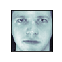

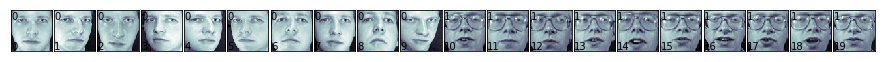

In [19]:
def print_faces(images, target, top_n):
    #出力する画像サイズを設定する
    fig = plt.figure(figsize = (12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        
        #正解ラベルを表示
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    plt.show()
    
print_faces(faces.images, faces.target, 20)

In [20]:
"""
画像のデータからそれが誰なのかを分類する
データの中身が確認できたので、分類を行なってみましょう。 
今回は、画像データからそれが誰なのかを分類します。 
scikit-learnのSVC(Support Vector Classifier)を使います。
"""
from sklearn.svm import SVC
svc_1 = SVC(kernel = 'linear') #パラメータ設定

SVCには、様々なパラメータがありますが一番重要なパラメータはkernelというものです。

ここでは詳しく説明しませんがどのような空間を作成するというものです。

今回は一番単純で計算速度がはやいlinear kernelを使用します
（他に定番のものとしてrbf kernelがよく使われます。）

まず、データを学習データとテストデータに分割します。

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state = 0)

学習データを使って学習させ、交差検定を行う

In [26]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, x, y, K):
    cv = KFold(len(y), K, shuffle=True, random_state = 0)
    scores = cross_val_score(clf, x, y, cv=cv)
    print(scores)
    print("Mean score:{} (+/-{})".format( np.mean(scores), sem(scores)))

evaluate_cross_validation(svc_1, x_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score:0.9133333333333334 (+/-0.012247448713915886)


実行すると、
[ 0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean score: 0.9133333333333334 (+/-0.012247448713915886)
と出力され91%の精度が出ているのでかなり良い結果となっていることがわかります。
学習データとテストデータの両方で性能を評価してみましょう。

In [28]:
def train_and_evaluate(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    
    print("Accuracy(学習データ)：", clf.score(x_train, y_train))
    print("Accuracy(テストデータ)：", clf.score(x_test, y_test))
    
train_and_evaluate(svc_1, x_train, x_test, y_train, y_test)

Accuracy(学習データ)： 1.0
Accuracy(テストデータ)： 0.99


In [29]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
print(faces.DESCR)

print(faces.keys())

#要素数の確認
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)


def print_faces(images, target, top_n):
    #出力する画像のサイズを設定する
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20, 20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)

        #正解ラベルを表示
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))

print_faces(faces.images, faces.target,20)


from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')


from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size=0.25,random_state=0)


from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

#交差検定
def evaluate_cross_validation(clf, x, y, K):
    cv = KFold(len(y), K,shuffle=True,random_state=0)
    scores = cross_val_score(clf,x,y,cv=cv)
    print(scores)
    print ("Mean score: {} (+/-{})".format( np.mean (scores), sem(scores)))

evaluate_cross_validation(svc_1,x_train,y_train,5)


def train_and_evaluate(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)

    print("Accuracy(学習データ):",clf.score(x_train,y_train))
    print("Accuracy(テストデータ):",clf.score(x_test,y_test))

train_and_evaluate(svc_1, x_train,x_test,y_train,y_test)


Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)
[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.9133333333333334 (+/-0.012247448713915886)
Accuracy(学習データ): 1

# ennshuu

In [70]:
import pandas as pd
df = pd.read_csv("zoo.csv", header = None)
display(df.head())
df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


(101, 18)

In [71]:
header = ["name"] + list(df.columns[1:])
print(header)

['name', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [72]:
df.columns = header
print(df.columns)
df.head()

Index(['name', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='object')


,name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [73]:
display(df.head(10))

,name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [74]:
y = df["name"].as_matrix()
print(y.shape)
print(y)

(101,)
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla'
 'gull' 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly'
 'kiwi' 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea' 'scorpion'
 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer' 'skua'
 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish' 'stingray' 'swan'
 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire' 'vole' 'vulture'
 'wallaby' 'wasp' 'wolf' 'worm' 'wren']


In [75]:
del df["name"]

In [76]:
display(df.head(10))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [77]:
X = df.as_matrix()
display(X)

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ..., 
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=int64)

In [78]:
X.shape

(101, 17)

In [79]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

#データ形状の確認
print(X.shape)
print(y.shape)

(101, 17)
(101,)


In [80]:
#SVCのロード
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [81]:
#データセットを分割する
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[0, 0, 1, ..., 0, 0, 3],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 2],
       ..., 
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [97]:
#交差検証
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, x, y, K):
    cv = KFold(len(y), K, shuffle=True)
    print(cv)
    print(len(y))
    print(x.shape)
    print(K)
    print(clf)
    
    scores = cross_val_score(clf, x, y, cv = cv)
    print(scores)
    print("Medan score : {} (+/-{})".format(np.mean(scores), sem(scores)))
    print(clf)
# print(cross_val_score(svc_1, X_train, y_train, cv= KFold(len(y_train), 5, shuffle=True)))
#print(cross_val_score(svc_1, X_train, y_train))

evaluate_cross_validation(svc_1, X_train, y_train, 3)

sklearn.cross_validation.KFold(n=80, n_folds=3, shuffle=True, random_state=None)
80
(80, 17)
3
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[ 0.  0.  0.]
Medan score : 0.0 (+/-0.0)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [52]:
def train_and_evaluate(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)

    print("Accuracy(学習データ):",clf.score(x_train,y_train))
    print("Accuracy(テストデータ):",clf.score(x_test,y_test))

train_and_evaluate(svc_1, X_train,X_test,y_train,y_test)

Accuracy(学習データ): 0.6375
Accuracy(テストデータ): 0.047619047619


In [61]:
import csv
import numpy as np


with open('./zoo.csv','r',encoding="utf-8_sig") as csvfile:
    zoo_reader = csv.reader(csvfile,delimiter=',',quotechar='"')

    #データと正解ラベルを読み取る
    zoo_x, zoo_y = [],[]
    for row in zoo_reader:
        zoo_x.append(row[1:17])
        zoo_y.append(row[17]) #正解ラベルは3列目の"survived"

    zoo_x = np.array(zoo_x) #型をリストからnumpy.ndarrayにする
    zoo_y = np.array(zoo_y) #型をリストからnumpy.ndarrayにする


from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(zoo_x, zoo_y,test_size=0.25,random_state=0)

from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')


from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

#交差検定
def evaluate_cross_validation(clf, x, y, K):
    cv = KFold(len(y), K,shuffle=True,random_state=0)
    scores = cross_val_score(clf,x,y,cv=cv)
    print(scores)
    print ("Mean score: {} (+/-{})".format( np.mean (scores), sem(scores)))

evaluate_cross_validation(svc_1,x_train,y_train,5)

[ 0.86666667  0.8         0.86666667  0.93333333  1.        ]
Mean score: 0.8933333333333333 (+/-0.03399346342395189)


In [66]:
import pandas as pd
df = pd.read_csv("zoo.csv", header = None)
display(df.head())

header = ["name"] + list(df.columns[1:])
print(header)

df.columns = header
print(df.columns)

display(df.head(10))

y = df["name"].as_matrix()
y

del df["name"]

display(df.head(10))

X = df.as_matrix()
display(X)

X.shape

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

#データ形状の確認
print(X.shape)
print(y.shape)

#SVCのインスタンス化
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

#データセットを分割する
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#交差検証
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, x, y, K):
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv = cv)
    print(scores)
    print("Medan score : {} (+/-{})".format(np.mean(scores), sem(scores)))
    
evaluate_cross_validation(svc_1, X_train, y_train, 5)


def train_and_evaluate(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)

    print("Accuracy(学習データ):",clf.score(x_train,y_train))
    print("Accuracy(テストデータ):",clf.score(x_test,y_test))

train_and_evaluate(svc_1, X_train,X_test,y_train,y_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


['name', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Index(['name', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='object')


,name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ..., 
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=int64)

(101, 17)
(101,)
[ 0.  0.  0.  0.  0.]
Medan score : 0.0 (+/-0.0)
Accuracy(学習データ): 0.6375
Accuracy(テストデータ): 0.047619047619


In [7]:
import pandas as pd
df = pd.read_csv("zoo.csv", header = None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
header = ["name"] + list(df.columns)
print(header)

['name', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
